In [2]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import datetime
import tensorflow as tf

In [3]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
# gpu available if result == 1

Num GPUs Available: 1


In [4]:
current_dir = os.getcwd()
print(current_dir)
train_path = os.path.join("EDAICNN&QCNN", "OCT2017", "train")
test_path = os.path.join("EDAICNN&QCNN", "OCT2017", "test")
val_path = os.path.join("EDAICNN&QCNN", "OCT2017", "val")
print(os.listdir(train_path))
print(os.listdir(test_path))
print(os.listdir(val_path))


c:\Users\sudes\OneDrive\Desktop\Deep learning\GPU
['CNV', 'DME', 'DRUSEN', 'NORMAL']
['CNV', 'DME', 'DRUSEN', 'NORMAL']
['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [5]:
subfolders = os.listdir(train_path) # all the directories in the train path
print('-'*30)
print('Images in Train Folder for different Types of Retinal Damage :')
for folder in subfolders:
    folder_path = os.path.join(train_path,folder)
    count = sum(1 for entry in os.scandir(folder_path))
    print(f"Number of images in {folder}: {count}")
print('-'*30)
print('Images in Test Folder for different Types of Retinal Damage :')
for folder in subfolders:
    folder_path = os.path.join(test_path,folder)
    count = sum(1 for entry in os.scandir(folder_path))
    print(f"Number of images in {folder}: {count}")
print('-'*30)
print('Images in Validation Folder for different Types of Retinal Damage :')
for folder in subfolders:
    folder_path = os.path.join(val_path,folder)
    count = sum(1 for entry in os.scandir(folder_path))
    print(f"Number of images in {folder}: {count}")
print('-'*30)

------------------------------
Images in Train Folder for different Types of Retinal Damage :
Number of images in CNV: 37205
Number of images in DME: 11348
Number of images in DRUSEN: 8616
Number of images in NORMAL: 26315
------------------------------
Images in Test Folder for different Types of Retinal Damage :
Number of images in CNV: 242
Number of images in DME: 242
Number of images in DRUSEN: 242
Number of images in NORMAL: 242
------------------------------
Images in Validation Folder for different Types of Retinal Damage :
Number of images in CNV: 8
Number of images in DME: 8
Number of images in DRUSEN: 8
Number of images in NORMAL: 8
------------------------------


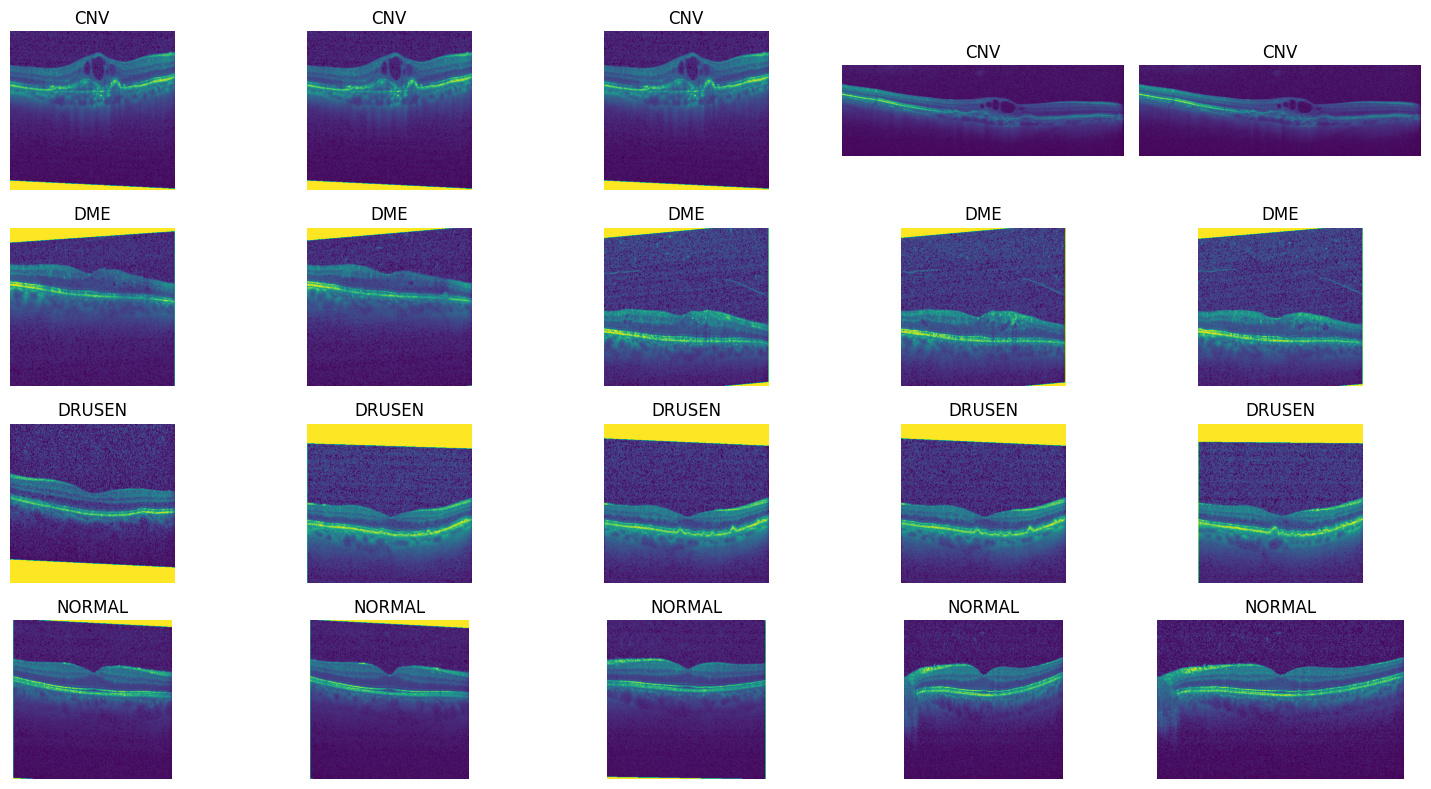

In [6]:
import matplotlib.pyplot as plt

# Create a figure with 4 rows and 5 columns
fig, axes = plt.subplots(4, 5, figsize=(15, 8))  
axes = axes.flatten()  # Flatten the axes array

axes_counter = 0

for folder in subfolders:
    files = os.listdir(os.path.join(train_path, folder))
    selected_files = files[25:30]  # Selecting 5 images

    for i, image in enumerate(selected_files):
        i += axes_counter
        if i >= len(axes):  # Ensure we don't exceed the number of axes
            break
        image_path = os.path.join(train_path, folder, image)
        img = plt.imread(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(folder)
    axes_counter += 5  # Move to the next set of axes

plt.tight_layout()
plt.show()

# VGG16 Model

**VGG16 Image PreProcessing**

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# the image are nearly having the resolution of 500px x 500px . However for VGG16 , the input image dimension must be *(224,224,3)*

input_shape = (224,224)
input_shape_rgb = (224,224,3)
batch_size = 32

# generating the image as per VGG16 
train_generator = ImageDataGenerator(
    horizontal_flip = True,
    rescale = 1/255, # res
    fill_mode = 'nearest'
)
test_generator = ImageDataGenerator(
    rescale=1/255, 
    fill_mode='nearest'
)
train_image_generator = train_generator.flow_from_directory(
    train_path,
    target_size=input_shape, # dimension of pixels
    batch_size=batch_size,  # Number of images per batch
    color_mode='rgb', # rgb values
    class_mode='categorical', # Labels are one-hot encoded (for multi-class classification) so we can directly use categorical_cross entropy instead of sparse cross entropy
    shuffle=True
)

test_image_generator = test_generator.flow_from_directory(
    test_path,
    target_size=input_shape,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 83484 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import  Flatten,Dense,MaxPooling2D,BatchNormalization,Conv2D,Dropout,AveragePooling2D

**VGG16 MODEL**

In [10]:
# VGG16
VGG16 = Sequential()
VGG16.add(Conv2D(64,kernel_size=(3,3), strides=1 , padding='same' , activation='relu', input_shape=(224,224,3)))
VGG16.add(Conv2D(64,kernel_size=(3,3), strides=1 , padding='same' , activation='relu'))
VGG16.add(MaxPooling2D(pool_size=(2,2) , strides=2))

VGG16.add(Conv2D(128,kernel_size=(3,3), strides=1 , padding='same' , activation='relu'))
VGG16.add(Conv2D(128,kernel_size=(3,3), strides=1 , padding='same' , activation='relu'))
VGG16.add(MaxPooling2D(pool_size=(2,2) , strides=2))

VGG16.add(Conv2D(256,kernel_size=(3,3), strides=1 , padding='same' , activation='relu'))
VGG16.add(Conv2D(256,kernel_size=(3,3), strides=1 , padding='same' , activation='relu'))
VGG16.add(Conv2D(256,kernel_size=(3,3), strides=1 , padding='same' , activation='relu'))
VGG16.add(MaxPooling2D(pool_size=(2,2) , strides=2))

VGG16.add(Conv2D(512,kernel_size=(3,3), strides=1 , padding='same' , activation='relu'))
VGG16.add(Conv2D(512,kernel_size=(3,3), strides=1 , padding='same' , activation='relu'))
VGG16.add(Conv2D(512,kernel_size=(3,3), strides=1 , padding='same' , activation='relu'))
VGG16.add(MaxPooling2D(pool_size=(2,2) , strides=2))

VGG16.add(Conv2D(512,kernel_size=(3,3), strides=1 , padding='same' , activation='relu'))
VGG16.add(Conv2D(512,kernel_size=(3,3), strides=1 , padding='same' , activation='relu'))
VGG16.add(Conv2D(512,kernel_size=(3,3), strides=1 , padding='same' , activation='relu'))
VGG16.add(MaxPooling2D(pool_size=(2,2) , strides=2))

VGG16.add(Flatten())

VGG16.add(Dense(4096,activation='relu'))
VGG16.add(Dense(4096,activation='relu'))
VGG16.add(Dense(1000,activation='softmax'))

VGG16.summary()

#VGG16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
VGG16.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Optimizer
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Evaluation metric
)

callback = EarlyStopping(
    monitor="val_loss",
    min_delta = 0.0001,
    patience = 5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

history = VGG16.fit(
    train_image_generator,
    epochs=100,
    validation_data=test_image_generator
)

# Results for VGG16

In [ ]:
test_loss, test_acc = VGG16.evaluate(test_image_generator)
print(f"Test Accuracy: {test_acc:.2f}") # evaluation of model



In [ ]:
plt.plot(history.history['loss'] , label='train')
plt.plot(history.history['val_loss'] , label='test')
plt.show()

In [ ]:
VGG16_trained_Model = VGG16.save("VGG16_custom_model.h5")

# AlexNet Model

**AlexNET Image PreProcessing**

In [ ]:
# input for Alexnet model has the dimension equal to 228x228
input_shape_AlexNET = (227,227)
input_shape_AlexNET_rgb = (227,227,3)
batch_size_AlexNET = 32

# generating the image as per requirement of AlexNET
train_generator_AlexNET = ImageDataGenerator(
    horizontal_flip = True,
    rescale = 1/228, # resolution normalization
    fill_mode = 'nearest'
)

test_generator_AlexNET = ImageDataGenerator(
    rescale = 1/228,
    fill_mode = 'nearest'
)

train_image_generator = train_generator.flow_from_directory(
    train_path,
    target_size = input_shape_AlexNET,
    batch_size = batch_size_AlexNET,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

test_image_generator = test_generator.flow_from_directory(
    test_path,
    target_size=input_shape_AlexNET,
    batch_size=batch_size_AlexNET,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 83484 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


**AlexNET Model**

In [ ]:
AlexNET = Sequential()

AlexNET.add(Conv2D(96,kernel_size=(11,11),strides=4,padding='valid',activation='relu',input_shape=(227,227,3))) #specifically for rgb image
AlexNET.add(MaxPooling2D(pool_size=(3,3),strides=2))

AlexNET.add(BatchNormalization())

AlexNET.add(Conv2D(256,kernel_size=(5,5),padding='same',strides=1,activation='relu'))
AlexNET.add(MaxPooling2D(pool_size=(3,3),strides=2))

AlexNET.add(BatchNormalization())

AlexNET.add(Conv2D(384,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
AlexNET.add(Conv2D(384,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
AlexNET.add(Conv2D(384,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
AlexNET.add(MaxPooling2D(pool_size=(3,3),strides=2))

AlexNET.add(Flatten())

AlexNET.add(Dense(4096,activation='relu'))
AlexNET.add(Dropout(0.5))

AlexNET.add(Dense(4096,activation='relu'))
AlexNET.add(Dropout(0.5))

AlexNET.add(Dense(1000, activation='softmax'))

AlexNET.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_14 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

AlexNET.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Optimizer
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Evaluation metric
)

callback = EarlyStopping(
    monitor="val_loss",
    min_delta = 0.0001,
    patience = 5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

history_AlexNET = AlexNET.fit(
    train_image_generator,
    epochs=100,
    validation_data=test_image_generator
)

# Results For AlexNET 

In [ ]:
test_loss, test_acc = AlexNET.evaluate(test_image_generator)
print(f"Test Accuracy: {test_acc:.2f}") # evaluation of model

In [ ]:
plt.plot(history_AlexNET.history['loss'] , label='train')
plt.plot(history_AlexNET.history['val_loss'] , label='test')
plt.show()

In [ ]:
AlexNET_trained_Model = AlexNET.save("VGG16_custom_model.h5")